## Solo Exploration Project - UN Data: Per capita government expenditure on health

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The first step is to read the data into a pandas DataFrame so the we can manipulate it later as needed.

In [2]:
gov_health_exp = pd.read_csv('../Data/health expenditure.csv')

Inspected dataframe using `.head()`, `.tail()`, `.info()`,`.shape` methods.

In [3]:
gov_health_exp.head()

,Country or Area,Year(s),Value,Value Footnotes
0,Afghanistan,2011,7.9,NaN
1,Afghanistan,2010,11.8,NaN
2,Afghanistan,2009,8.4,NaN
3,Afghanistan,2008,1.8,NaN
4,Afghanistan,2007,3.1,NaN


In [4]:
gov_health_exp.tail()

,Country or Area,Year(s),Value,Value Footnotes
3236,Zimbabwe,1999,27.0,NaN
3237,Zimbabwe,1998,46.2,NaN
3238,Zimbabwe,1997,63.3,NaN
3239,Zimbabwe,1996,71.8,NaN
3240,Zimbabwe,1995,79.5,NaN


In [5]:
gov_health_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  3241 non-null   object 
 1   Year(s)          3241 non-null   int64  
 2   Value            3241 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 101.4+ KB


info() function to reprsent rows and columns does gov_health_exp dataframe contains and types of data present in its column. 

Modified gov_health_exp datafrme using `.drop()` and `.rename()`.

In [6]:
gov_health_exp = gov_health_exp.drop(columns = 'Value Footnotes')
gov_health_exp = gov_health_exp.rename(columns = {'Country or Area':'Country', 'Year(s)':'Year', 'Value': 'Per_Capita_Expenditure'})
print (gov_health_exp)

          Country  Year  Per_Capita_Expenditure
0     Afghanistan  2011                     7.9
1     Afghanistan  2010                    11.8
2     Afghanistan  2009                     8.4
3     Afghanistan  2008                     1.8
4     Afghanistan  2007                     3.1
...           ...   ...                     ...
3236     Zimbabwe  1999                    27.0
3237     Zimbabwe  1998                    46.2
3238     Zimbabwe  1997                    63.3
3239     Zimbabwe  1996                    71.8
3240     Zimbabwe  1995                    79.5

[3241 rows x 3 columns]


In [7]:
gov_health_exp["Year"].value_counts().sort_index()

1995    189
1996    190
1997    190
1998    191
1999    191
2000    191
2001    192
2002    191
2003    191
2004    191
2005    191
2006    191
2007    191
2008    191
2009    190
2010    190
2011    190
Name: Year, dtype: int64

In [8]:
gov_health_exp["Country"].nunique()

193

 Used value_count() to see how many countries are included in data set and data is available for how many years for each country

Created new dataframe gov_health_exp_2010 by subsetting gov_health_exp. 

In [9]:
gov_health_exp_2010 = gov_health_exp[gov_health_exp['Year'] == 2010]
gov_health_exp_2010

,Country,Year,Per_Capita_Expenditure
1,Afghanistan,2010,11.8
11,Albania,2010,217.3
28,Algeria,2010,291.0
45,Andorra,2010,2293.1
62,Angola,2010,118.3
...,...,...,...
3151,Vanuatu,2010,207.3
3168,Venezuela (Bolivarian Republic of),2010,248.9
3185,Viet Nam,2010,80.1
3202,Yemen,2010,32.5


In [10]:
gov_health_exp_2010.describe()

,Year,Per_Capita_Expenditure
count,190.0,190.000000
mean,2010.0,752.096842
std,0.0,1093.032165
min,2010.0,3.100000
25%,2010.0,76.900000
50%,2010.0,283.550000
75%,2010.0,852.250000
max,2010.0,5660.100000


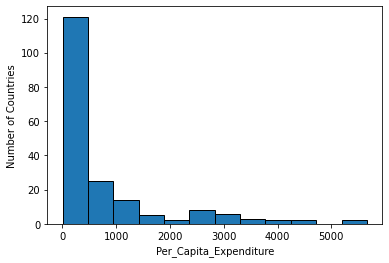

In [11]:
plt.hist(gov_health_exp_2010['Per_Capita_Expenditure'], bins=12, edgecolor = 'black');
plt.xlabel('Per_Capita_Expenditure')
plt.ylabel('Number of Countries');

In [12]:
gov_health_exp_2010.sort_values('Per_Capita_Expenditure', ascending = False)

,Country,Year,Per_Capita_Expenditure
1670,Luxembourg,2010,5660.1
1874,Monaco,2010,5238.1
2129,Norway,2010,4610.0
2027,Netherlands,2010,4335.3
3100,United States of America,2010,3966.7
...,...,...,...
555,Chad,2010,14.9
1,Afghanistan,2010,11.8
943,Eritrea,2010,7.7
790,Democratic Republic of the Congo,2010,7.4


In [20]:
gov_health_exp_pivoted = pd.pivot_table(gov_health_exp.loc[gov_health_exp['Year'].isin([2000, 2010])],values = 'Per_Capita_Expenditure', index=['Country'], columns=['Year']).dropna()
gov_health_exp_pivoted

Year,2000,2010
Country,,
Albania,96.2,217.3
Algeria,138.0,291.0
Andorra,1275.3,2293.1
Angola,36.8,118.3
Antigua and Barbuda,394.5,694.1
...,...,...
Vanuatu,92.1,207.3
Venezuela (Bolivarian Republic of),200.0,248.9
Viet Nam,22.8,80.1


In [21]:
gov_health_exp_pivoted.columns

Int64Index([2000, 2010], dtype='int64', name='Year')

In [22]:
gov_health_exp_pivoted.info()
type(gov_health_exp_pivoted)

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, Albania to Zambia
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    189 non-null    float64
 1   2010    189 non-null    float64
dtypes: float64(2)
memory usage: 4.4+ KB


pandas.core.frame.DataFrame

In [24]:
gov_health_exp_pivoted["Percentage_Change"] = 100 * (gov_health_exp_pivoted[2010] - gov_health_exp_pivoted[2000])/ gov_health_exp_pivoted[2000]
gov_health_exp_pivoted

Year,2000,2010,Percentage_Change
Country,,,
Albania,96.2,217.3,125.883576
Algeria,138.0,291.0,110.869565
Andorra,1275.3,2293.1,79.808672
Angola,36.8,118.3,221.467391
Antigua and Barbuda,394.5,694.1,75.944233
...,...,...,...
Vanuatu,92.1,207.3,125.081433
Venezuela (Bolivarian Republic of),200.0,248.9,24.450000
Viet Nam,22.8,80.1,251.315789


In [25]:
gov_health_exp_pivoted[gov_health_exp_pivoted["Percentage_Change"] < 0]

Year,2000,2010,Percentage_Change
Country,,,
Chad,17.8,14.9,-16.292135
Eritrea,9.1,7.7,-15.384615
Lebanon,246.2,235.0,-4.549147
Nauru,407.0,190.4,-53.218673
Oman,536.9,478.9,-10.802757
San Marino,3241.8,2692.2,-16.953544
Sao Tome and Principe,124.2,53.2,-57.165862
Timor-Leste,65.3,62.7,-3.981623
Yemen,47.1,32.5,-30.997877


In [18]:
gov_health_exp_pivoted.nlargest(2, "Percentage_Change")

Per_Capita_Expenditure         \
Year                                               2000   2010   
Country                                                          
Iraq                                                0.9  280.5   
Democratic Republic of the Congo                    0.5    7.4   

                                 Percentage_Change  
Year                                                
Country                                             
Iraq                                  31066.666667  
Democratic Republic of the Congo       1380.000000

In [36]:
gov_health_exp_pivoted.head(76).tail(1)

Year,2000,2010,Percentage_Change
Country,,,
India,17.0,35.6,109.411765


In [ ]:
gov_health_exp[gov_health_exp['Country']== 'United States of America'].sort_values('Year').plot.line(x='Year', y='Per_Capita_Expenditure')
plt.xlabel('Year')
plt.ylabel('Per_Capita_Expenditure')
plt.title('United States Per_Capita_Expenditure');

In [ ]:
 gov_health_exp.loc[gov_health_exp['Country'].isin(['United States of America', 'India'])]


In [ ]:
gov_health_exp[gov_health_exp['Country']== 'India'].sort_values('Year').plot.line(x='Year', y='Per_Capita_Expenditure', color = 'orange')
plt.xlabel('Year')
plt.ylabel('Per_Capita_Expenditure')
plt.title('India Per_Capita_Expenditure');

In [ ]:
continents = pd.read_csv('../data/continents.csv')
continents['Country'] = continents['Country'].str.replace('United States','United States of America')
continents                                                          


In [ ]:
gov_health_exp = gov_health_exp.merge(continents, how ='inner')
gov_health_exp

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(data = gov_health_exp.groupby(['Continent'])['Country'].nunique().to_frame().reset_index(), x ='Continent', 
            y='Country', 
            hue='Continent', 
            dodge=False)
plt.ylabel('Number of Countries')
plt.legend(bbox_to_anchor =(1.0, 1.0))
plt.xticks(rotation =45);


In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(data = gov_health_exp[gov_health_exp['Year'] == 2010], x ='Continent', y ='Per_Capita_Expenditure')
plt.xticks(rotation = 45);

In [ ]:
gdp_df = pd.read_csv('../Data/gdp_per_capita.csv', nrows = 6868)
gdp_df.head()

In [ ]:
gdp_df.info()

In [ ]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value': 'GDP_Per_Capita'})
print (gdp_df)

In [ ]:
gdp_df['Country'] = gdp_df['Country'].str.replace('United States','United States of America')
gdp_df

In [ ]:
gov_exp_gdp =gov_health_exp.merge(gdp_df, how = 'inner')
gov_exp_gdp

In [ ]:
gov_exp_gdp_2010 = gov_exp_gdp[gov_exp_gdp['Year'] == 2010]
gov_exp_gdp_2010 

In [ ]:

plt.figure(figsize = (12,8))
sns.scatterplot(data = gov_exp_gdp_2010, x = 'Per_Capita_Expenditure', y = 'GDP_Per_Capita',
                hue = 'Continent', edgecolor = 'black'
               )
plt.xlabel('Per_Capita_Expenditure, 2010')
plt.ylabel('GDP_Per_Capita, 2010')
plt.grid (True)
plt.text(3966.7, 54359.134, 'United States')
plt.title('Per_Capita_Expenditure, 2010 vs. GDP_Per_Capita, 2010')
plt.legend(bbox_to_anchor =(1.0, 1.0));

Greater the GDP_Per_Capita greater is the per capita investment of government on health. 

Positive, directly proportional relationship between 2 variables.

Although, There are a few countries that are somewhat far from the general trend. 

In [ ]:
gov_exp_gdp_2010[['Per_Capita_Expenditure', 'GDP_Per_Capita']].corr()

Did bring another data set life expectancy used in guided exploration project.

In [ ]:
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_4553490.csv', header = 2)
life_expectancy = life_expectancy.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])
life_expectancy

In [ ]:
life_expectancy = life_expectancy.melt(
                  id_vars="Country Name",
                  var_name="Year", 
                  value_name="life expectancy")
life_expectancy

In [ ]:
life_expectancy['Country Name'] = life_expectancy['Country Name'].str.replace('United States','United States of America')
life_expectancy

In [ ]:
gov_exp_gdp['Year'] = gov_exp_gdp['Year'].astype(str)

In [ ]:
gov_exp_gdp_le = pd.merge(left = gov_exp_gdp, 
         right = life_expectancy.rename(columns = {'Country Name': 'Country'}), 
         left_on = ['Country', 'Year'], 
         right_on = ['Country', 'Year'])
gov_exp_gdp_le

In [ ]:
gov_exp_gdp_le['Year'] = gov_exp_gdp_le['Year'].astype(int)

In [ ]:
gov_exp_gdp_le_2010 = gov_exp_gdp_le[gov_exp_gdp_le['Year'] == 2010]
gov_exp_gdp_le_2010

In [ ]:
gov_exp_gdp_le_2010[gov_exp_gdp_le_2010['Country'] == 'India']


In [ ]:

plt.figure(figsize = (12,8))
sns.scatterplot(data = gov_exp_gdp_le_2010, x = 'life expectancy', y = 'Per_Capita_Expenditure',
                hue = 'Continent', edgecolor = 'black'
               )
plt.xlabel('Life Expectancy')
plt.ylabel('Per_Capita Expenditure 2010')
plt.grid (True)
plt.text(78.54, 3966.7,'United States')
plt.title('Life expectancy vs. Per_Capita_Expenditure, 2010')
plt.legend(bbox_to_anchor =(1.0, 1.0));

In [ ]:
gov_exp_gdp_le_2010[['life expectancy','Per_Capita_Expenditure']].corr()